# Crime Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
try:
    df = pd.read_csv('crimes.csv')
    print('Dataset loaded successfully.')
except FileNotFoundError:
    print('Error: crimes.csv not found. Make sure the file is in the correct directory.')

Dataset loaded successfully.


## Data Cleaning and Preparation

In [3]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
print('Date columns converted and Year/Month extracted.')

Date columns converted and Year/Month extracted.


## 1. Which areas have the highest crime rates?

In [4]:
area_crime_counts = df['AREA NAME'].value_counts()
print("Crime Counts by Area:")
print(area_crime_counts)

Crime Counts by Area:
AREA NAME
Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Wilshire        8482
Topanga         8478
Rampart         8346
West Valley     8102
West LA         7911
Northeast       7628
Devonshire      7411
Mission         6990
Harbor          6618
Hollenbeck      6193
Foothill        5983
Name: count, dtype: int64


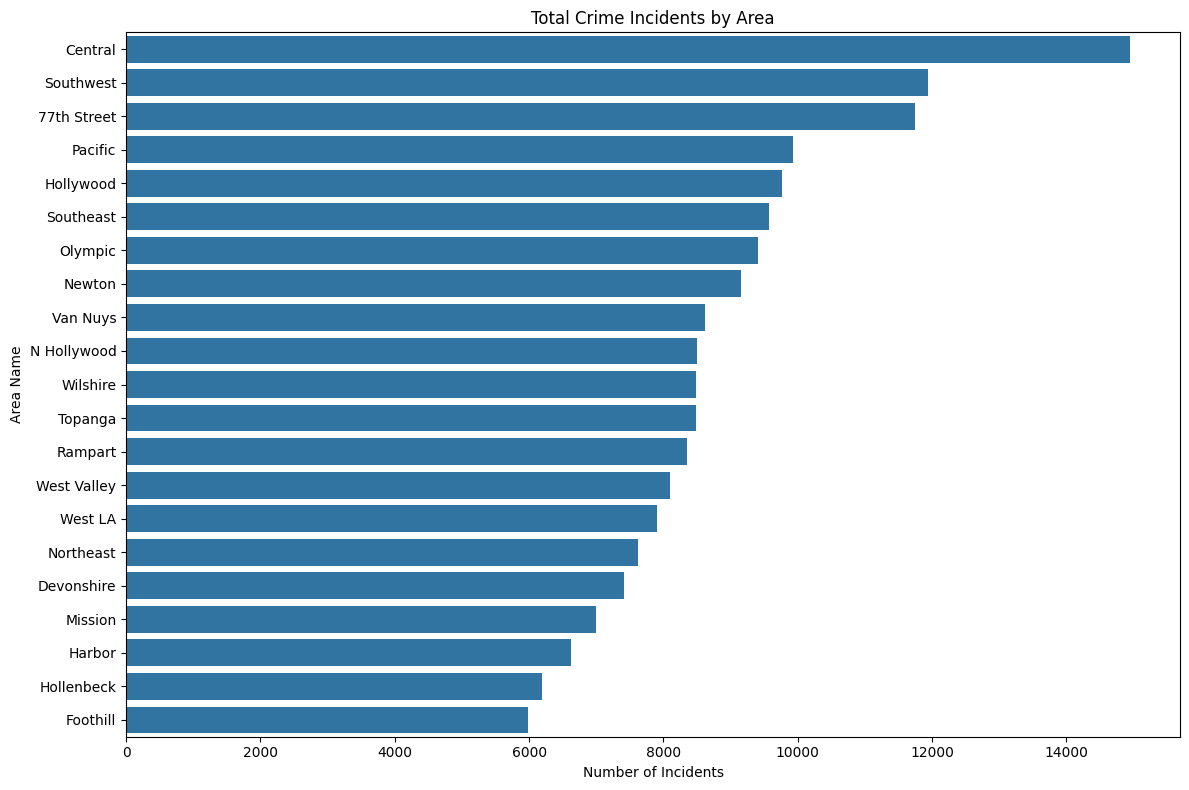

In [5]:
plt.figure(figsize=(12, 8))
sns.barplot(y=area_crime_counts.index, x=area_crime_counts.values, orient='h')
plt.title('Total Crime Incidents by Area')
plt.xlabel('Number of Incidents')
plt.ylabel('Area Name')
plt.tight_layout()
plt.show()

## 2. Has crime increased or decreased over time?

In [6]:
latest_year = df['Year'].max()
if df[df['Year'] == latest_year].shape[0] > 1:
    analysis_year = latest_year - 1
else:
    analysis_year = latest_year - 2

df_last_year = df[df['Year'] == analysis_year]
monthly_crime_counts = df_last_year.groupby('Month').size()

print(f"Monthly Crime Trend for {analysis_year}:")
print(monthly_crime_counts)

Monthly Crime Trend for 2022:
Month
1       392
2       252
3       402
4       582
5      1614
6     14853
7     14584
8     14739
9     14165
10    14948
11    13571
12    14738
dtype: int64


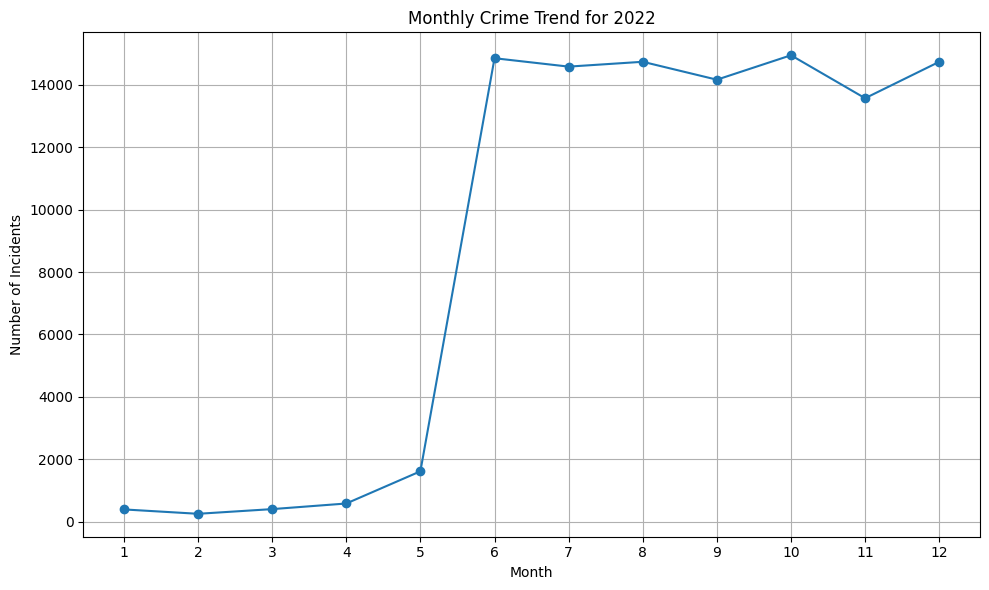

In [7]:
plt.figure(figsize=(10, 6))
monthly_crime_counts.plot(kind='line', marker='o')
plt.title(f'Monthly Crime Trend for {analysis_year}')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

## Geospatial Analysis

In [10]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='LON', y='LAT', data=df, s=1, alpha=0.1)
plt.title('Geospatial Distribution of All Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `LON` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x1000 with 0 Axes>